In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('music.csv',encoding='gbk')
data.head()

,小程序介绍
0,发现创意，乐享生活；个性化购物与创意生活指南。提供高品质的产品，注重时尚与性价比，强调设计感...
1,-----多快好省，只为品质生活-----\n1. 新人大礼：新人专享188元大礼包\n2....
2,放心买宠物，就找『买1只』（1）卖家认证（2）担保交易（3）30天保障（4）健康保险（5）分...
3,购物遇到困难无法抉择？试试购物决策助手吧，专家意见结合用户需求，最适合你的商品，就要这么选！...
4,便利店超市专用


In [3]:
introduction = data.小程序介绍.values.tolist()

In [4]:
fileObject = open('introduction1.txt', 'w')
for line in introduction:
    fileObject.write(line)
    fileObject.write('\n')
fileObject.close()

In [12]:
from PIL import Image
import jieba
#jieba.enable_parallel(4)
# Setting up parallel processes :4 ,but unable to run on Windows
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import os
# jieba.load_userdict("txt\userdict.txt")
# add userdict by load_userdict()
from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

stopwords_path = d + '/stopwords.txt'
# Chinese fonts must be set
#font_path = d + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

# the path to save worldcloud
imgname1 = d + '/intro1.jpg'
imgname2 = d + '/intro2.jpg'
# read the mask / color image taken from
back_coloring = imread(path.join(d, d + '/alice.jpg'))
alice_mask = np.array(Image.open(path.join(d, "shopping.jpg")))
# Read the whole text.
text = open(path.join(d, d + '/introduction1.txt')).read()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [13]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [14]:
def jieba_processing_txt(text):
    #for word in userdict_list:
       # jieba.add_word(word)   
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)




In [15]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14.0, 7.0)

In [16]:
wc = WordCloud(font_path='simhei.ttf', background_color="white", max_words=200, mask=alice_mask,
               max_font_size=400, random_state=42, width=2000, height=1000, margin=4)

In [17]:
wc.generate(jieba_processing_txt(text))

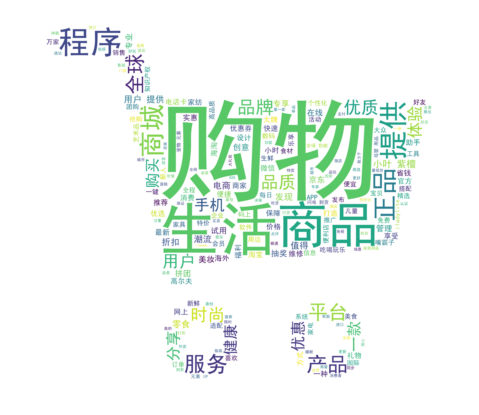

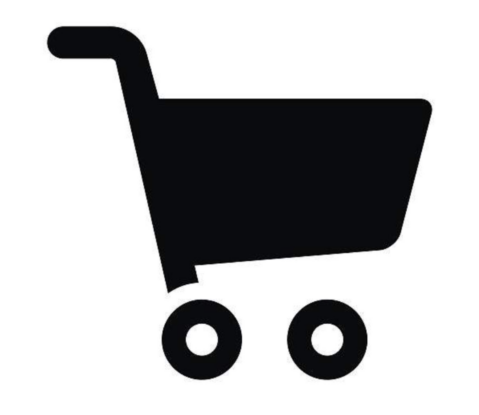

In [18]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()